In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_excel('transactions.xlsx')

In [3]:
df.head()

,SL no.,name of platform,how much paid,whom to paid,description,time
0,1.0,FamPay,20.0,K H KRISHNAMURTHY,FamPay Payment,2025-09-17 12:26
1,2.0,FamPay,10.0,BANGALORE METRO,FamPay Payment,2025-09-17 12:09
2,3.0,FamPay,10.0,BANGALORE METRO,FamPay Payment,2025-09-17 11:13
3,4.0,FamPay,45.0,MANJUNATH B,FamPay Payment,2025-09-17 08:08
4,5.0,FamPay,10.0,PRAKASH,FamPay Payment,2025-09-16 20:31


In [4]:
df_needed=df.drop(columns=['SL no.','name of platform','description','time'])

In [5]:
df_needed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   how much paid  101 non-null    float64
 1   whom to paid   100 non-null    object 
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [6]:
df_needed['whom to paid'].unique()

array(['K H KRISHNAMURTHY', 'BANGALORE METRO', 'MANJUNATH  B', 'PRAKASH',
       'ARYAN PRAKASHCHANDRA CHOUDHARY', 'Zepto Marketplace',
       'AISHWARYA DEPARTMENTAL STORE', 'BMTC BUS KA51AH3264', 'HARISH K',
       'ANUSHA V', 'Bangalore Metro Rail Corporation Ltd',
       'Valorant Points', 'VISHAL L GAONKAR', 'BMTC BUS KA57F6014',
       'Anand S B', 'BMTC BUS KA51AH2743', 'SUNIL KUMAR C S', 'Zepto',
       'Janak  Pant', 'ZEPTO MARKETPLACE PRIVATE LIMITED',
       'GIRISH BABU L', 'AKASH RANGAREJ', 'BMTC BUS KA57F4800',
       'YASHWNTHA T P', 'BMTC BUS KA57F4608', 'BMTC BUS KA57F4341',
       'ZEPTO', 'ZEPTONOW', 'Airtel Prepaid', 'M DARSHAN',
       'IIT GUWAHATI GATE', 'BMTC BUS KA57F5111', 'Gowrav K M',
       'BMTC BUS KA57F5965', 'BMTC BUS KA57F4677', nan], dtype=object)

In [25]:
df_needed.dropna(inplace=True)

In [26]:
people=df_needed['whom to paid'].value_counts().to_dict()

In [27]:
people=pd.DataFrame(people.items(),columns=['Name','No. of transactions'])

In [28]:
people.head()

,Name,No. of transactions
0,Zepto Marketplace,11
1,Bangalore Metro Rail Corporation Ltd,9
2,MANJUNATH B,7
3,BANGALORE METRO,6
4,SUNIL KUMAR C S,5


In [29]:
people.shape[0]

35

In [30]:
no_of_transaction=df_needed.shape[0]

In [32]:
how_much_paid_to_single_person={}
for i in df_needed['whom to paid'].unique():
    sum=0
    for j in range(1,no_of_transaction):
        if df_needed['whom to paid'][j]==i:
            sum+=df_needed['how much paid'][j]
    how_much_paid_to_single_person[i]=sum
print(how_much_paid_to_single_person)

{'K H KRISHNAMURTHY': 80.0, 'BANGALORE METRO': 90.0, 'MANJUNATH  B': 312.0, 'PRAKASH': 20.0, 'ARYAN PRAKASHCHANDRA CHOUDHARY': 1503.0, 'Zepto Marketplace': 1610.8000000000002, 'AISHWARYA DEPARTMENTAL STORE': 178.0, 'BMTC BUS KA51AH3264': 48.0, 'HARISH K': 180.0, 'ANUSHA V': 80.0, 'Bangalore Metro Rail Corporation Ltd': 300.0, 'Valorant Points': 9240.0, 'VISHAL L GAONKAR': 4208.0, 'BMTC BUS KA57F6014': 60.0, 'Anand S B': 38.0, 'BMTC BUS KA51AH2743': 24.0, 'SUNIL KUMAR C S': 277.0, 'Zepto': 188.39, 'Janak  Pant': 285.0, 'ZEPTO MARKETPLACE PRIVATE LIMITED': 425.15999999999997, 'GIRISH BABU L': 1700.0, 'AKASH RANGAREJ': 2990.0, 'BMTC BUS KA57F4800': 48.0, 'YASHWNTHA T P': 40.0, 'BMTC BUS KA57F4608': 30.0, 'BMTC BUS KA57F4341': 24.0, 'ZEPTO': 349.54, 'ZEPTONOW': 277.32, 'Airtel Prepaid': 22.99, 'M DARSHAN': 3500.0, 'IIT GUWAHATI GATE': 2000.0, 'BMTC BUS KA57F5111': 23.0, 'Gowrav K M': 20.0, 'BMTC BUS KA57F5965': 24.0, 'BMTC BUS KA57F4677': 18.0}


In [ ]:
total_per_person=pd.DataFrame(how_much_paid_to_single_person.items(),columns=['Name','No. of transactions'])

In [41]:
total_per_person.head(0)

,Name,No. of transactions


<Axes: xlabel='Name'>

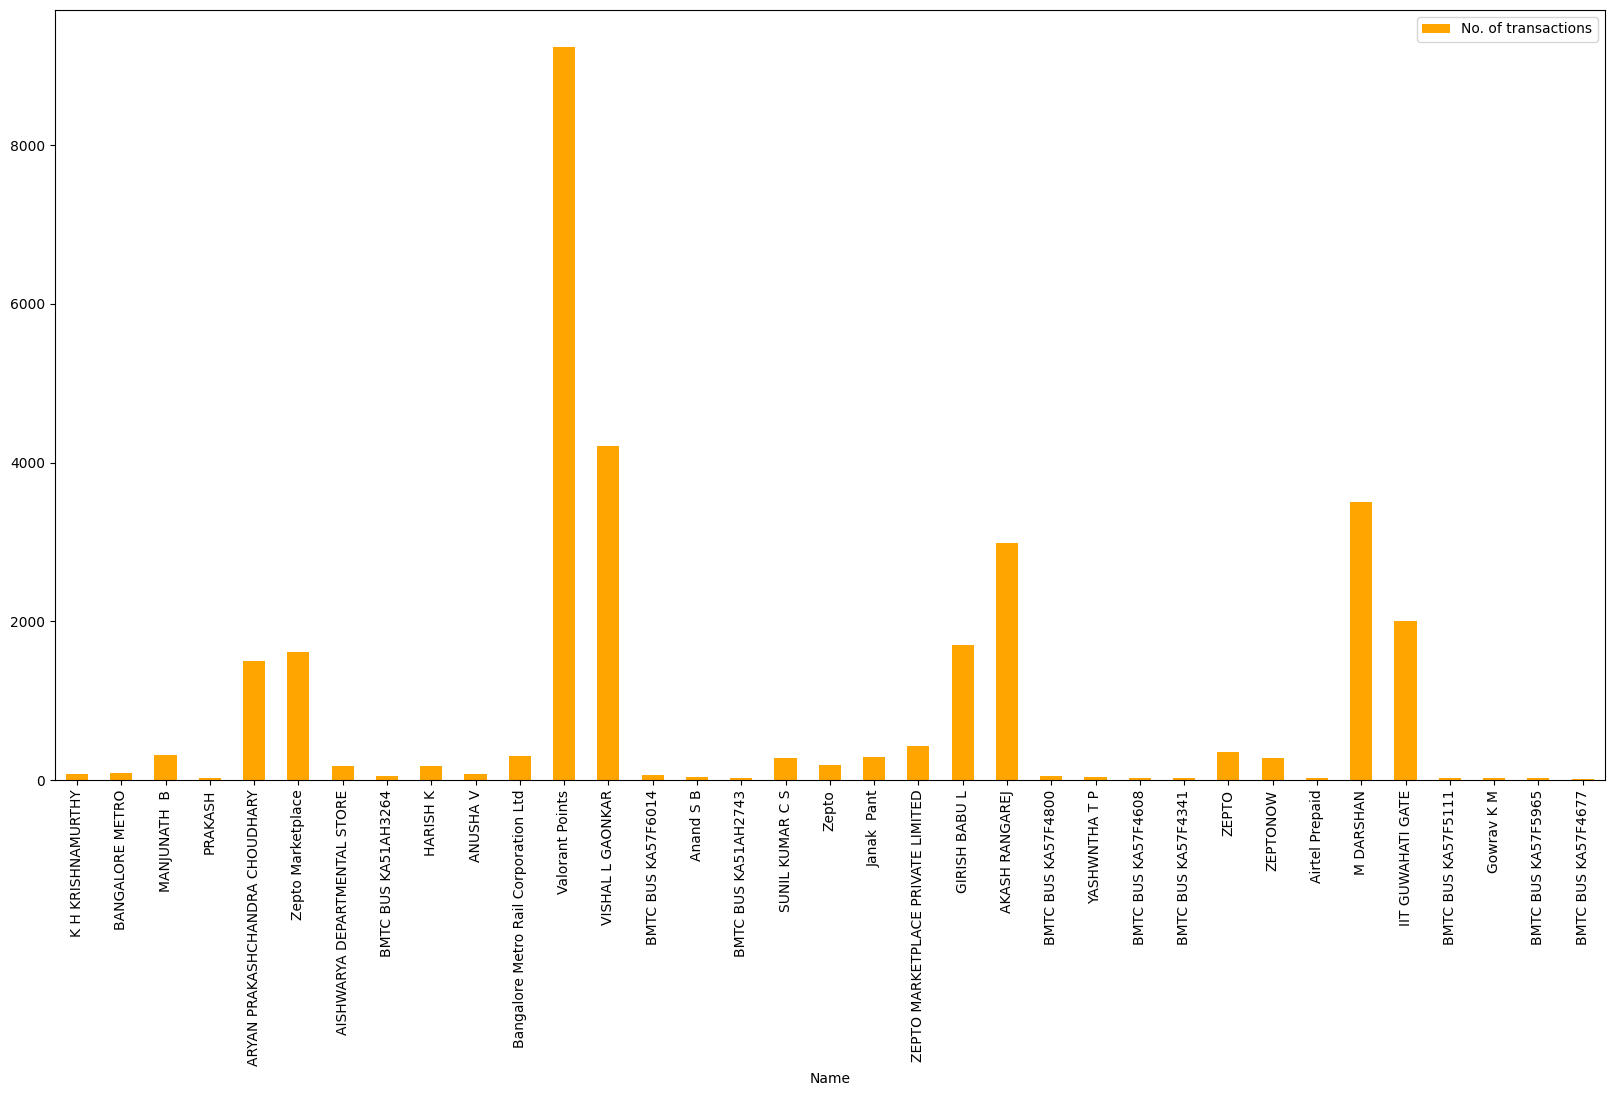

In [44]:
total_per_person.plot(kind='bar',figsize=(20,10),x='Name',y='No. of transactions',color='orange')